# Demo 1: Basics

In [1]:
import sys
sys.path.append('..')
import loci as lc
from loci import io
from loci import analytics
from loci import plots
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
%matplotlib inline
import matplotlib

## Create a GeoDataFrame from a CSV file containing POIs from OpenStreetMap in Berlin

In [2]:
pois = io.read_poi_csv(input_file='../datasets/osmpois-berlin.csv',
                       col_id='id',
                       col_name='name',
                       col_lon='lon',
                       col_lat='lat',
                       col_kwds='kwds',
                       col_sep=';',
                       kwds_sep=',',
                       source_crs='EPSG:4326',
                       target_crs='EPSG:3068',
                       keep_other_cols=False)
print('Loaded ' + str(len(pois.index)) + ' POIs.')

b'Skipping line 22818: expected 5 fields, saw 6\nSkipping line 23991: expected 5 fields, saw 6\nSkipping line 25828: expected 5 fields, saw 6\nSkipping line 35946: expected 5 fields, saw 6\nSkipping line 35949: expected 5 fields, saw 7\nSkipping line 35951: expected 5 fields, saw 9\nSkipping line 43246: expected 5 fields, saw 6\nSkipping line 46730: expected 5 fields, saw 6\nSkipping line 48344: expected 5 fields, saw 6\nSkipping line 50558: expected 5 fields, saw 6\n'


Loaded 53496 POIs.


In [3]:
pois.head(10)

,id,name,kwds,geometry
0,N29318897,U Kurfürstenstraße,"[transport, subway]",POINT (22106.32722588773 19231.82318284977)
1,N29324017,U Mendelssohn-Bartholdy-Park,"[transport, subway]",POINT (22991.86532023628 19671.37924249026)
2,N29334078,Abschnitt 26,"[amenity, police]",POINT (18263.1507574199 17661.79288238728)
3,N29334080,Schmargendorf,"[poi, suburb]",POINT (17413.86949738537 16912.28004474215)
4,N29336704,Charlottenburg,"[poi, suburb]",POINT (18565.6226327344 21007.13288168284)
5,N29336705,Westend,"[poi, suburb]",POINT (14909.21266003121 20763.29363802465)
6,N29336992,Halensee,"[poi, suburb]",POINT (17423.44376249968 18951.30095636496)
7,N29337165,Grunewald,"[poi, suburb]",POINT (15431.7980756182 17861.62166170081)
8,N29421304,Malchow/Dorfstraße,"[transport, busstop]",POINT (30326.62834961097 28068.83735617907)
9,N29421338,Wartenberg,"[poi, suburb]",POINT (32793.78518101332 27488.28479399765)


## Show a sample on the map (map center and zoom level are set automatically)

In [4]:
m = lc.plots.map_pois(pois.sample(100), show_bbox=True)
m

## Compute and plot the frequency of the POI keywords

In [5]:
kf = lc.analytics.kwds_freq(pois)
kf

{'transport': 13580,
 'subway': 555,
 'amenity': 1273,
 'police': 68,
 'poi': 667,
 'suburb': 98,
 'busstop': 10996,
 'station': 540,
 'hamlet': 82,
 'tourist': 2783,
 'memorial': 921,
 'health': 1710,
 'hospital': 106,
 'shop': 14334,
 'convenience': 945,
 'accommodation': 884,
 'hotel': 737,
 'motel': 2,
 'fuel': 321,
 'food': 9947,
 'restaurant': 4017,
 'art': 495,
 'cafe': 2078,
 'money': 458,
 'bank': 446,
 'fastfood': 1971,
 'hifi': 187,
 'tramstop': 828,
 'sport': 1273,
 'swimming': 80,
 'biergarten': 100,
 'firestation': 90,
 'postoffice': 123,
 'town': 2,
 'pow': 646,
 'islamic': 39,
 'cinema': 86,
 'library': 125,
 'village': 6,
 'pub': 1026,
 'bar': 633,
 'alcohol': 346,
 'pet': 73,
 'supermarket': 1503,
 'copyshop': 216,
 'diy': 228,
 'bakery': 1186,
 'pharmacy': 771,
 'peak': 50,
 'education': 3588,
 'nursery': 2024,
 'theatre': 417,
 'embassy': 183,
 'butcher': 90,
 'motorcycle': 119,
 'school': 1157,
 'rentalcar': 164,
 'museum': 184,
 'playground': 310,
 'attraction': 1

<module 'matplotlib.pyplot' from '/Users/dskoutas/miniconda3/envs/loci_env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

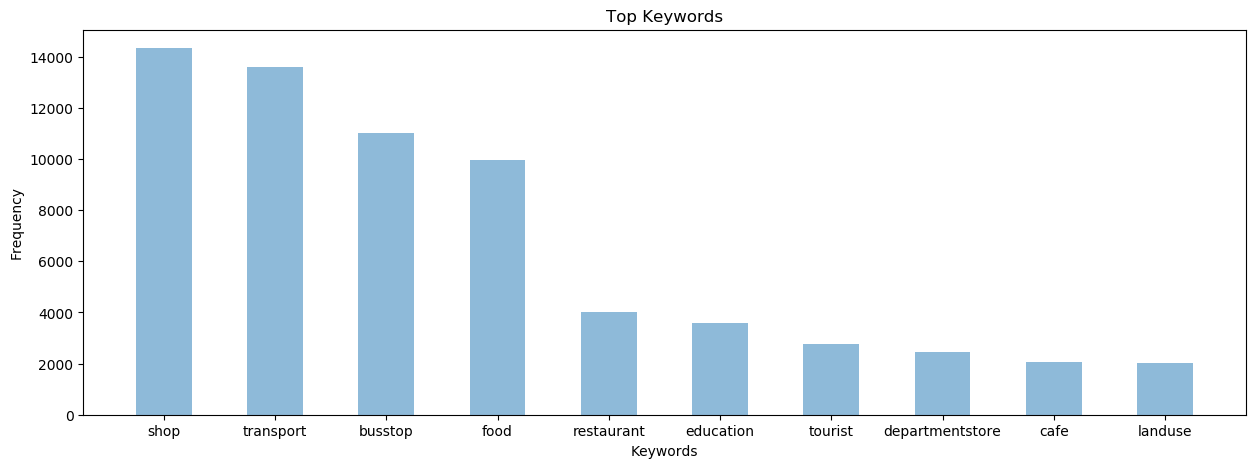

In [6]:
lc.plots.barchart(kf, plot_title='Top Keywords', x_axis_label='Keywords', y_axis_label='Frequency')

## Select a specific type of POIs and generate a heat map

In [7]:
pois_filtered = lc.analytics.filter_by_kwd(pois, 'shop')
lc.plots.heatmap(pois_filtered, radius=12)